# Training DL models with default hyperparameters on the IDS2017

In this notebook, different DL models are used on the IDS2018 without hyperparameter optimization to test the performance. Deep neural networks, autoencoders, convolutional networks and RNNs are tested on the dataset.

In [1]:
from utils_ids2018 import load_ids2018, feature_selection
from notebook_utils import plot_confusion_matrix, metrics_report, calculate_metrics_by_label, test_metrics_DL, plot_overall_accuracy
from notebook_utils import test_metrics_AE
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

attack_labels = {
    0: 'Benign',
    1: 'Bot',
    2: 'Brute Force -Web',
    3: 'Brute Force -XSS',
    4: 'DDOS attack-HOIC',
    5: 'DDOS attack-LOIC-UDP',
    6: 'DDoS attacks-LOIC-HTTP',
    7: 'DoS attacks-GoldenEye',
    8: 'DoS attacks-Hulk',
    9: 'DoS attacks-SlowHTTPTest',
    10: 'DoS attacks-Slowloris',
    11: 'FTP-BruteForce',
    12: 'Infilteration',
    13: 'SQL Injection',
    14: 'SSH-Bruteforce'
}

## Load Dataset

In [2]:
df = load_ids2018()

Processed 1/10 files.
Processed 2/10 files.
Processed 3/10 files.
Processed 4/10 files.
Processed 5/10 files.
Processed 6/10 files.
Processed 7/10 files.
Processed 8/10 files.
Processed 9/10 files.
Processed 10/10 files.
Creating is_attack column...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623303 entries, 0 to 1623302
Data columns (total 81 columns):
 #   Column             Non-Null Count    Dtype   
---  ------             --------------    -----   
 0   dst_port           1623295 non-null  float64 
 1   protocol           1623295 non-null  float64 
 2   timestamp          0 non-null        float64 
 3   flow_duration      1623295 non-null  float64 
 4   tot_fwd_pkts       1623295 non-null  float64 
 5   tot_bwd_pkts       1623295 non-null  float64 
 6   totlen_fwd_pkts    1623295 non-null  float64 
 7   totlen_bwd_pkts    1623295 non-null  float64 
 8   fwd_pkt_len_max    1623295 non-null  float64 
 9   fwd_pkt_len_min    1623295 non-null  float64 
 10  fwd_pkt_len_mean   1

In [3]:
X = df.iloc[:, 0:78]
Y = df[["label", "is_attack", "label_code"]]

X.info()
Y.info()
print(Y.label.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1613825 entries, 0 to 1250804
Data columns (total 78 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   dst_port           1613825 non-null  float64
 1   protocol           1613825 non-null  float64
 2   flow_duration      1613825 non-null  float64
 3   tot_fwd_pkts       1613825 non-null  float64
 4   tot_bwd_pkts       1613825 non-null  float64
 5   totlen_fwd_pkts    1613825 non-null  float64
 6   totlen_bwd_pkts    1613825 non-null  float64
 7   fwd_pkt_len_max    1613825 non-null  float64
 8   fwd_pkt_len_min    1613825 non-null  float64
 9   fwd_pkt_len_mean   1613825 non-null  float64
 10  fwd_pkt_len_std    1613825 non-null  float64
 11  bwd_pkt_len_max    1613825 non-null  float64
 12  bwd_pkt_len_min    1613825 non-null  float64
 13  bwd_pkt_len_mean   1613825 non-null  float64
 14  bwd_pkt_len_std    1613825 non-null  float64
 15  flow_byts_s        1613825 non-null  

## Feature Selection

In [4]:
X = feature_selection(X, Y)

              Feature  Information Gain
1       flow_duration          0.233601
11        flow_pkts_s          0.229814
12      flow_iat_mean          0.227692
20         bwd_pkts_s          0.194219
27  init_fwd_win_byts          0.187567
4     fwd_pkt_len_max          0.187241
6    fwd_pkt_len_mean          0.187110
10        flow_byts_s          0.176991
9    bwd_pkt_len_mean          0.166613
7     bwd_pkt_len_max          0.143088
28  init_bwd_win_byts          0.104665
29   fwd_seg_size_min          0.103233
16        bwd_iat_max          0.098116
13        bwd_iat_tot          0.098087
14       bwd_iat_mean          0.096072
17        bwd_iat_min          0.086457
15        bwd_iat_std          0.081868
5     fwd_pkt_len_min          0.071256
8     bwd_pkt_len_min          0.070956
2        tot_fwd_pkts          0.063140
0            protocol          0.061043
3        tot_bwd_pkts          0.055377
32           idle_min          0.046213
30        active_mean          0.027824


## Split Dataset

The dataset is split into a training set and a testing set with a ratio of 0.8/0.2. The dataset is stratified according to the label to have an equal representation of all classes in the 2 subsets.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y.label_code)

In [6]:
Y_train.label.value_counts()

label
Benign                      1070878
DDOS attack-HOIC              55054
DDoS attacks-LOIC-HTTP        46142
DoS attacks-Hulk              37046
Bot                           23007
FTP-BruteForce                15517
SSH-Bruteforce                15007
Infilteration                 12762
DoS attacks-SlowHTTPTest      11223
DoS attacks-GoldenEye          3372
DoS attacks-Slowloris           844
DDOS attack-LOIC-UDP            134
Brute Force -Web                 42
Brute Force -XSS                 22
SQL Injection                    10
Label                             0
Name: count, dtype: int64

In [7]:
Y_test.label.value_counts()

label
Benign                      267720
DDOS attack-HOIC             13763
DDoS attacks-LOIC-HTTP       11536
DoS attacks-Hulk              9261
Bot                           5752
FTP-BruteForce                3879
SSH-Bruteforce                3752
Infilteration                 3190
DoS attacks-SlowHTTPTest      2806
DoS attacks-GoldenEye          843
DoS attacks-Slowloris          211
DDOS attack-LOIC-UDP            34
Brute Force -Web                11
Brute Force -XSS                 5
SQL Injection                    2
Label                            0
Name: count, dtype: int64

Statistics

In [8]:
benign_percentage = len(Y_train.label[Y_train["label"]=="BENIGN"])/len(Y_train)
print('Percentage of benign samples: %.4f' % benign_percentage)
print(Y_train.is_attack.value_counts())

Percentage of benign samples: 0.0000
is_attack
0    1070878
1     220182
Name: count, dtype: int64


## SMOTE Resampling

In [9]:
from imblearn.over_sampling import SMOTE

def resample_dataset(X, Y, min_samples, attack_labels):
    Y = Y.drop(columns=['label'])
    combined = pd.concat([X, Y], axis=1)
    counts = Y['label_code'].value_counts()
    samples_number = {i: max(counts[i], min_samples) for i in np.unique(Y['label_code'])}
    combined_array = combined.values
    y_array = Y['label_code'].values
    resampler = SMOTE(random_state=42, sampling_strategy=samples_number)
    resampled_array, y_resampled = resampler.fit_resample(combined_array, y_array)
    X_resampled = resampled_array[:, :-Y.shape[1]]
    Y_resampled = resampled_array[:, -Y.shape[1]:]
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    Y_resampled_df = pd.DataFrame(Y_resampled, columns=Y.columns)
    Y_resampled_df['label'] = Y_resampled_df['label_code'].map(attack_labels)
    Y_resampled_df['label'] = Y_resampled_df['label'].astype('category')
    return X_resampled_df, Y_resampled_df

X_smote_train, Y_smote_train = resample_dataset(X_train, Y_train, 100000, attack_labels)


In [10]:
Y_smote_train.label.value_counts()

label
Benign                      1070878
Bot                          100000
Brute Force -Web             100000
Brute Force -XSS             100000
DDOS attack-HOIC             100000
DDOS attack-LOIC-UDP         100000
DDoS attacks-LOIC-HTTP       100000
DoS attacks-GoldenEye        100000
DoS attacks-Hulk             100000
DoS attacks-SlowHTTPTest     100000
DoS attacks-Slowloris        100000
FTP-BruteForce               100000
Infilteration                100000
SSH-Bruteforce               100000
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler_smote = StandardScaler()
scaler_smote.fit(X_smote_train)

StandardScaler()

In [12]:
# Save the model
def save_model(model, model_name):
    # Create directory if it does not exist
    model_dir = os.path.join("models", "DL_models_default_2018")
    os.makedirs(model_dir, exist_ok=True)
    # Save the model
    model.save(os.path.join(model_dir, f"{model_name}.keras"))

## DNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM, TimeDistributed, RepeatVector, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

metrics = {}

Epoch 1/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 42s 670us/step - accuracy: 0.9756 - loss: 0.0900 - val_accuracy: 0.5917 - val_loss: 1.6476
Epoch 2/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 734us/step - accuracy: 0.9857 - loss: 0.0618 - val_accuracy: 0.5929 - val_loss: 1.5829
Epoch 3/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 49s 792us/step - accuracy: 0.9865 - loss: 0.0514 - val_accuracy: 0.5867 - val_loss: 1.5724
Epoch 4/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 46s 744us/step - accuracy: 0.9871 - loss: 0.0502 - val_accuracy: 0.5957 - val_loss: 1.5786
Epoch 5/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 45s 725us/step - accuracy: 0.9875 - loss: 0.0489 - val_accuracy: 0.6015 - val_loss: 1.4801
Epoch 6/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 37s 601us/step - accuracy: 0.9880 - loss: 0.0469 - val_accuracy: 0.5186 - val_loss: 1.6904
Epoch 7/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 36s 586us/step - accuracy: 0.9856 - loss: 0.0532 - val_accuracy: 0.5779 - val_loss: 1.6477
Epoch 8/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 36s 585us/s

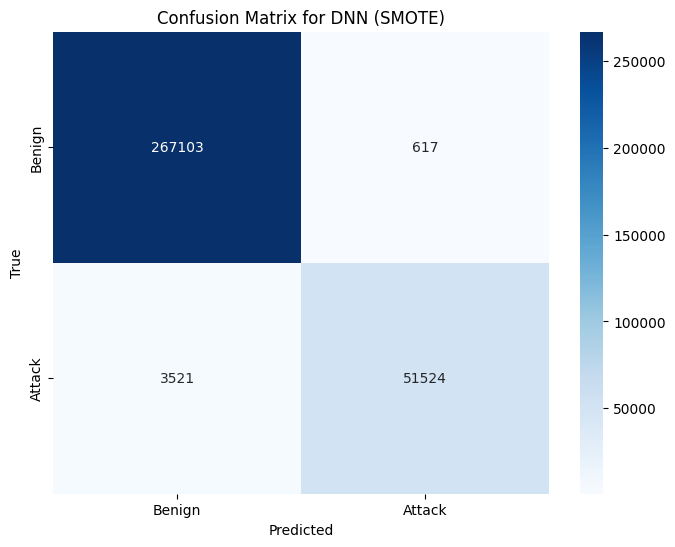

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.997695  SMOTE
1              Infilteration  0.015674  SMOTE
2           DDOS attack-HOIC  0.999782  SMOTE
3   DoS attacks-SlowHTTPTest  1.000000  SMOTE
4           DoS attacks-Hulk  1.000000  SMOTE
5     DDoS attacks-LOIC-HTTP  0.994279  SMOTE
6             FTP-BruteForce  1.000000  SMOTE
7             SSH-Bruteforce  1.000000  SMOTE
8                        Bot  0.947497  SMOTE
9      DoS attacks-GoldenEye  1.000000  SMOTE
10     DoS attacks-Slowloris  0.976303  SMOTE
11      DDOS attack-LOIC-UDP  0.941176  SMOTE
12          Brute Force -XSS  1.000000  SMOTE
13             SQL Injection  0.000000  SMOTE
14          Brute Force -Web  0.909091  SMOTE


In [15]:
# Define DNN model
def create_dnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate DNN model
dnn_model = create_dnn_model(X_smote_train.shape[1])
dnn_model.fit(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, epochs=10, batch_size=32, 
              validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate and save the model
metrics["DNN"] = test_metrics_DL("DNN", dnn_model, scaler_smote, X_test, Y_test, reshape=False)
save_model(dnn_model, "DNN_SMOTE")


## CNN

Epoch 1/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 85s 1ms/step - accuracy: 0.9712 - loss: 0.1007 - val_accuracy: 0.6668 - val_loss: 1.3720
Epoch 2/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - accuracy: 0.9841 - loss: 0.0620 - val_accuracy: 0.6296 - val_loss: 1.4028
Epoch 3/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 89s 1ms/step - accuracy: 0.9851 - loss: 0.0551 - val_accuracy: 0.5938 - val_loss: 1.5384
Epoch 4/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step - accuracy: 0.9868 - loss: 0.0513 - val_accuracy: 0.6211 - val_loss: 1.6697
10087/10087 ━━━━━━━━━━━━━━━━━━━━ 7s 708us/step
Classification Report (Test CNN (SMOTE)):
              precision    recall  f1-score   support

           0     0.9864    0.9978    0.9921    267720
           1     0.9888    0.9333    0.9602     55045

    accuracy                         0.9868    322765
   macro avg     0.9876    0.9655    0.9762    322765
weighted avg     0.9868    0.9868    0.9867    322765

Accuracy: 0.9868139358356699
Precision: 0.9868365839

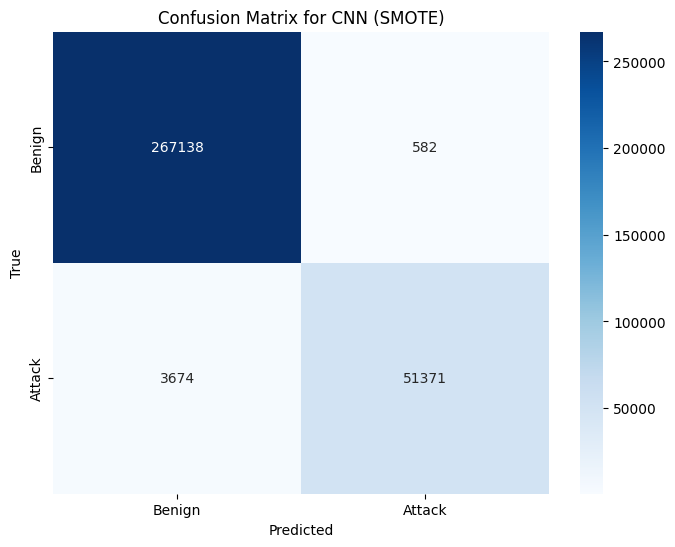

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.997826  SMOTE
1              Infilteration  0.013480  SMOTE
2           DDOS attack-HOIC  0.999927  SMOTE
3   DoS attacks-SlowHTTPTest  1.000000  SMOTE
4           DoS attacks-Hulk  1.000000  SMOTE
5     DDoS attacks-LOIC-HTTP  0.982576  SMOTE
6             FTP-BruteForce  1.000000  SMOTE
7             SSH-Bruteforce  1.000000  SMOTE
8                        Bot  0.947670  SMOTE
9      DoS attacks-GoldenEye  1.000000  SMOTE
10     DoS attacks-Slowloris  0.900474  SMOTE
11      DDOS attack-LOIC-UDP  1.000000  SMOTE
12          Brute Force -XSS  1.000000  SMOTE
13             SQL Injection  0.000000  SMOTE
14          Brute Force -Web  0.909091  SMOTE


In [16]:
# Define CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate CNN model
cnn_model = create_cnn_model((X_smote_train.shape[1], 1))

history = cnn_model.fit(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, epochs=10, batch_size=32, 
                        validation_split=0.2, 
                        callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

# Evaluate and save the model
metrics["CNN"] = test_metrics_DL("CNN", cnn_model, scaler_smote, X_test, Y_test, reshape=False)
save_model(cnn_model, "CNN_SMOTE")


## RNN

In [17]:
# Define RNN model
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(32))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate RNN model
rnn_model = create_rnn_model((X_smote_train.shape[1], 1))
rnn_model.fit(scaler_smote.transform(X_smote_train), Y_smote_train.is_attack, epochs=10, batch_size=32, 
              validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 446s 7ms/step - accuracy: 0.9583 - loss: 0.1129 - val_accuracy: 0.5946 - val_loss: 1.5842
Epoch 2/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 3989s 64ms/step - accuracy: 0.9848 - loss: 0.0558 - val_accuracy: 0.6314 - val_loss: 1.4365
Epoch 3/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 29776s 482ms/step - accuracy: 0.9887 - loss: 0.0454 - val_accuracy: 0.5977 - val_loss: 1.6935
Epoch 4/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 266s 4ms/step - accuracy: 0.9897 - loss: 0.0422 - val_accuracy: 0.5924 - val_loss: 1.5544
Epoch 5/10
61772/61772 ━━━━━━━━━━━━━━━━━━━━ 246s 4ms/step - accuracy: 0.9899 - loss: 0.0415 - val_accuracy: 0.5998 - val_loss: 1.5905


10087/10087 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
Classification Report (Test RNN (SMOTE)):
              precision    recall  f1-score   support

           0     0.9879    0.9963    0.9921    267720
           1     0.9810    0.9409    0.9605     55045

    accuracy                         0.9868    322765
   macro avg     0.9845    0.9686    0.9763    322765
weighted avg     0.9868    0.9868    0.9867    322765

Accuracy: 0.9868077393769461
Precision: 0.9867593040908925
Recall: 0.9868077393769461
F1 Score: 0.9866976176062834
AUC: 0.9685600561020412


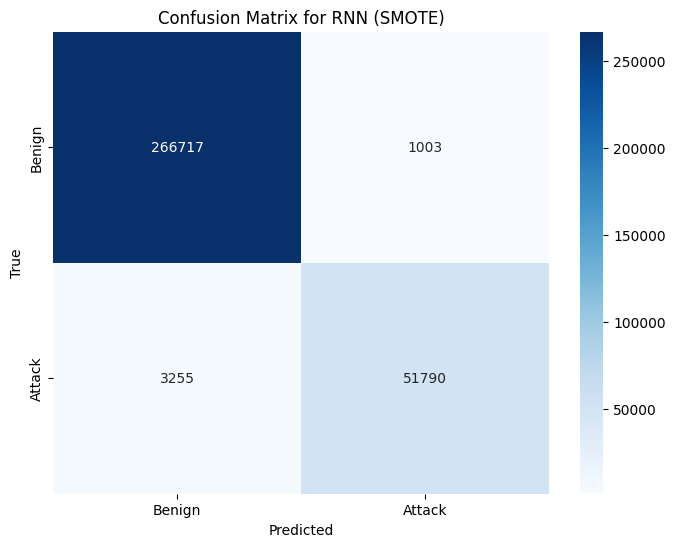

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.996254  SMOTE
1              Infilteration  0.021317  SMOTE
2           DDOS attack-HOIC  0.999709  SMOTE
3   DoS attacks-SlowHTTPTest  1.000000  SMOTE
4           DoS attacks-Hulk  1.000000  SMOTE
5     DDoS attacks-LOIC-HTTP  0.994105  SMOTE
6             FTP-BruteForce  1.000000  SMOTE
7             SSH-Bruteforce  1.000000  SMOTE
8                        Bot  0.997740  SMOTE
9      DoS attacks-GoldenEye  1.000000  SMOTE
10     DoS attacks-Slowloris  0.786730  SMOTE
11      DDOS attack-LOIC-UDP  1.000000  SMOTE
12          Brute Force -XSS  1.000000  SMOTE
13             SQL Injection  0.000000  SMOTE
14          Brute Force -Web  0.909091  SMOTE


In [18]:
# Evaluate and save the model
metrics["RNN"] = test_metrics_DL("RNN", rnn_model, scaler_smote, X_test, Y_test, reshape=False)
save_model(rnn_model, "RNN_SMOTE")

## Autoencoder

In [19]:
# Filter the training data to include only benign samples
benign_data = X_train[Y_train['is_attack'] == 0]

# Standardize the benign data
scaler_AE = StandardScaler()
scaler_AE.fit(benign_data)

# Define Autoencoder model
def create_autoencoder_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(input_shape, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create, train, and evaluate Autoencoder model
autoencoder_model = create_autoencoder_model(benign_data.shape[1])
autoencoder_model.fit(scaler_AE.transform(benign_data), scaler_AE.transform(benign_data), epochs=10, batch_size=32, 
                      validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Epoch 1/10
26772/26772 ━━━━━━━━━━━━━━━━━━━━ 19s 677us/step - accuracy: 0.0378 - loss: -625285696.0000 - val_accuracy: 0.0229 - val_loss: -27422318592.0000
Epoch 2/10
26772/26772 ━━━━━━━━━━━━━━━━━━━━ 18s 672us/step - accuracy: 0.0368 - loss: -85717303296.0000 - val_accuracy: 0.0230 - val_loss: -891249033216.0000
Epoch 3/10
26772/26772 ━━━━━━━━━━━━━━━━━━━━ 18s 684us/step - accuracy: 0.0392 - loss: -1359852994560.0000 - val_accuracy: 0.0230 - val_loss: -7476544536576.0000
Epoch 4/10
26772/26772 ━━━━━━━━━━━━━━━━━━━━ 18s 668us/step - accuracy: 0.0387 - loss: -8883403751424.0000 - val_accuracy: 0.0820 - val_loss: -35081915727872.0000
Epoch 5/10
26772/26772 ━━━━━━━━━━━━━━━━━━━━ 18s 673us/step - accuracy: 0.0389 - loss: -36740253351936.0000 - val_accuracy: 0.0230 - val_loss: -118576941891584.0000
Epoch 6/10
26772/26772 ━━━━━━━━━━━━━━━━━━━━ 19s 692us/step - accuracy: 0.0376 - loss: -114885610438656.0000 - val_accuracy: 0.0426 - val_loss: -324571517419520.0000
Epoch 7/10
26772/26772 ━━━━━━━━━━━━

10087/10087 ━━━━━━━━━━━━━━━━━━━━ 5s 448us/step
Classification Report (Test AE (SMOTE)):
              precision    recall  f1-score   support

           0     0.8421    0.9137    0.8764    267720
           1     0.2840    0.1665    0.2099     55045

    accuracy                         0.7863    322765
   macro avg     0.5630    0.5401    0.5432    322765
weighted avg     0.7469    0.7863    0.7627    322765

Accuracy: 0.7862531563211624
Precision: 0.7468857089007251
Recall: 0.7862531563211624
F1 Score: 0.7627465114859958
AUC: 0.5400965190020086


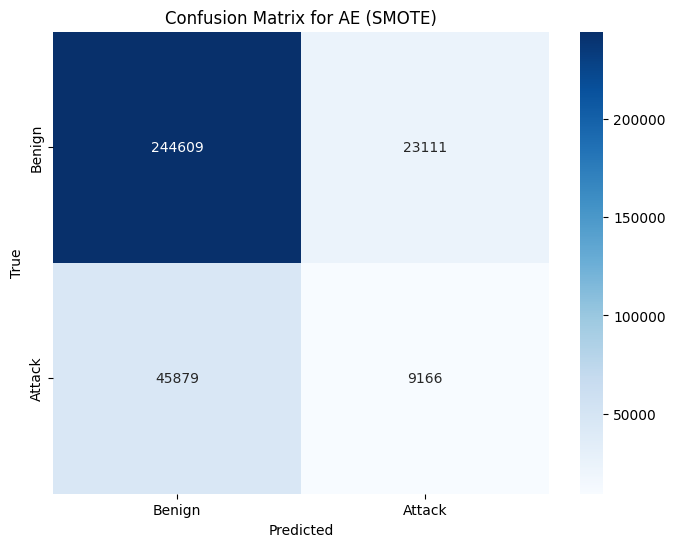

Metrics by Label (SMOTE):
                       Label  Accuracy Method
0                     Benign  0.913675  SMOTE
1              Infilteration  0.149843  SMOTE
2           DDOS attack-HOIC  0.000291  SMOTE
3   DoS attacks-SlowHTTPTest  1.000000  SMOTE
4           DoS attacks-Hulk  0.000000  SMOTE
5     DDoS attacks-LOIC-HTTP  0.007455  SMOTE
6             FTP-BruteForce  1.000000  SMOTE
7             SSH-Bruteforce  0.484275  SMOTE
8                        Bot  0.000174  SMOTE
9      DoS attacks-GoldenEye  0.039146  SMOTE
10     DoS attacks-Slowloris  0.260664  SMOTE
11      DDOS attack-LOIC-UDP  0.000000  SMOTE
12          Brute Force -XSS  0.400000  SMOTE
13             SQL Injection  0.000000  SMOTE
14          Brute Force -Web  0.454545  SMOTE


In [20]:
# Evaluate and save the model
from notebook_utils import test_metrics_AE
metrics["AE"] = test_metrics_AE("AE", autoencoder_model, scaler_AE, X_test, Y_test, 90)
save_model(autoencoder_model, "AE_SMOTE")